## Final Capstone - Deep Learning

For this stage, create a Notebook that builds and demonstrates your data science product. Reference other scripts as needed, but make sure to include those in the same repo. This Notebook should demonstrate your technical prowess as well as your skills in visualization and narrative storytelling. As such, it should include all stages of your process in a clean, easy-to-read format.

Specifically, make sure to do the following:

- 1. **Wrangle your data:** Get your data into the Notebook in the best format possible for your analysis and model-building.

- 2. **Explore your data:** Make visualizations and conduct statistical analyses to explain what's happening with your data, why it's interesting, and what features you intend to take advantage of for your modeling.

- 3. **Build a modeling pipeline:** Build your model in a coherent pipeline of linked stages that is efficient and easy to implement.

- 4. **Evaluate your models:** You should have built multiple models, which you should thoroughly evaluate and compare via a robust analysis of residuals and failures.

- 5. **Present and thoroughly explain your product:** Describe your model in detail: why you chose it, why it works, what problem it solves, and how it will run in a production-like environment. What would you need to do to maintain it going forward?

Provide the link to the finished Notebook and your dataset below.

## 1. Introduction to the data

Sign languages (also known as signed languages) are languages that use the visual-manual modality to convey meaning. Sign languages are expressed through manual articulations in combination with non-manual elements. Sign languages are use manual communication to convey meaning. This can include simultaneously employing hand gestures, movement, orientation of the fingers, arms or body, and facial expressions to convey a speaker's ideas. Our aim was to create a model that can predict Sign language digits (0 - 9) from the input images. Since we were dealing with images, it seemed intuitive to use CNN as it greatly reduces the number of parameters of the model to learn.  According to interviews with people who work with speech impaired persons, speech impaired people have difficulties in communicating with other people around them who do not know the sign language, and this situation may cause them to isolate themselves from society and lose their sense of independence. **To increase the quality of life of individuals with facilitating communication between individuals who use sign language and who do not know this language, a proposal Convolutional Neural Network (CNN) architecture that can get 98% test accuracy on our dataset presented, and compared with the existing popular CNN models. **

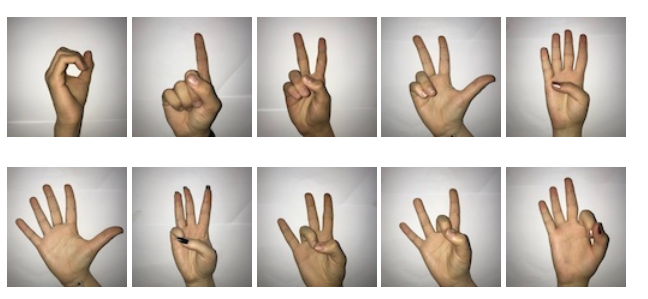

In [236]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "sign.png", width = 600, height = 300)

In [249]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
# import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

from sklearn.model_selection import train_test_split

In [250]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [251]:
# load data set
all_X = np.load('C:/Users/Lakshmi/Desktop/Study/Thinkful/Deep_Learning/Capstone_4/X.npy')
all_Y = np.load('C:/Users/Lakshmi/Desktop/Study/Thinkful/Deep_Learning/Capstone_4/Y.npy')

## 2. Explore the data

In [252]:
print(" Max value of X: ",all_X.max())
print(" Min value of X: ",all_X.min())
print(" Shape of X: ",X.shape)

print("\n Max value of Y: ",all_Y.max())
print(" Min value of Y: ",all_Y.min())
print(" Shape of Y: ",all_Y.shape)

 Max value of X:  1.0
 Min value of X:  0.003921569
 Shape of X:  (2062, 64, 64, 1)

 Max value of Y:  1.0
 Min value of Y:  0.0
 Shape of Y:  (2062, 10)


In [253]:
print(all_X[0].shape)

(64, 64)


## Y (labels) are already one-hot-encoded.

## 3.Visualization of Data

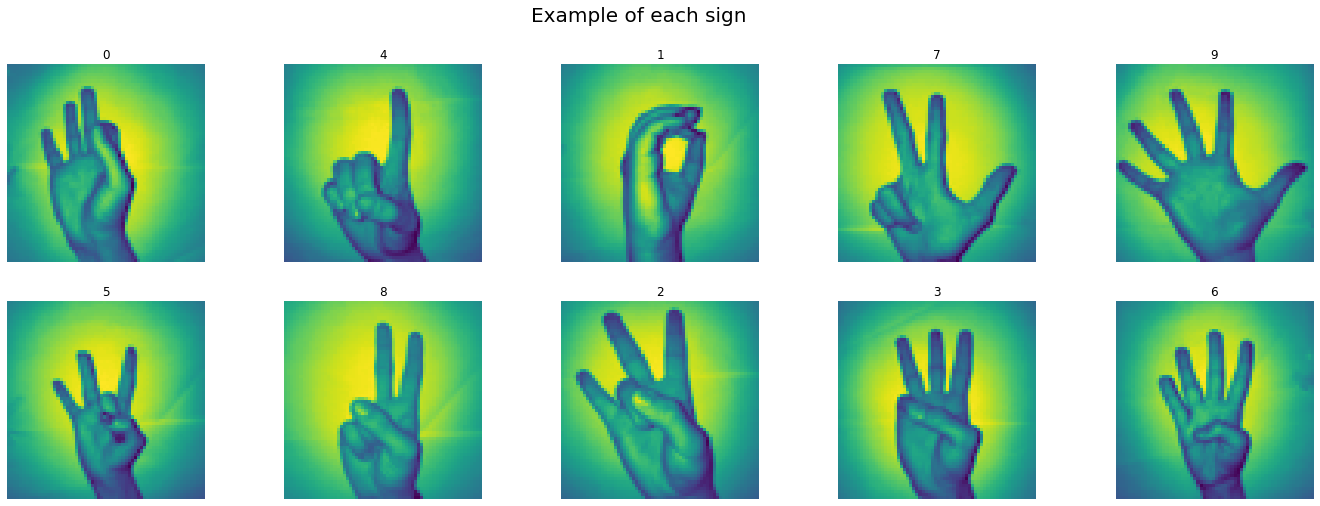

In [254]:
plt.figure(figsize=(24,8))

plt.subplot(2,5,1)
plt.title(all_Y[0].argmax())
plt.imshow(all_X[0])
plt.axis("off")

plt.subplot(2,5,2)
plt.title(all_Y[1000].argmax())
plt.imshow(all_X[1000])
plt.axis("off")

plt.subplot(2,5,3)
plt.title(all_Y[222].argmax())
plt.imshow(all_X[222])
plt.axis("off")

plt.subplot(2,5,4)
plt.title(all_Y[1500].argmax())
plt.imshow(all_X[1500])
plt.axis("off")

plt.subplot(2,5,5)
plt.title(all_Y[2000].argmax())
plt.imshow(all_X[2000])
plt.axis("off")

plt.subplot(2,5,6)
plt.title(all_Y[1200].argmax())
plt.imshow(all_X[1200])
plt.axis("off")

plt.subplot(2,5,7)
plt.title(all_Y[1700].argmax())
plt.imshow(all_X[1700])
plt.axis("off")

plt.subplot(2,5,8)
plt.title(all_Y[500].argmax())
plt.imshow(all_X[500])
plt.axis("off")

plt.subplot(2,5,9)
plt.title(all_Y[700].argmax())
plt.imshow(all_X[700])
plt.axis("off")

plt.subplot(2,5,10)
plt.title(all_Y[1400].argmax())
plt.imshow(all_X[1400])
plt.axis("off")

plt.suptitle("Example of each sign", fontsize=20)
plt.show()

## 4. Test Train Split the data

In [344]:
# Train Test split
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(all_X, all_Y, test_size=test_size, random_state=42)

In [345]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1649, 64, 64)
x_test shape (413, 64, 64)
y_train shape (1649, 10)
y_test shape (413, 10)


In [346]:
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size \n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size \n')

Training shape: (1649, 64, 64)
1649 sample, 64 x 64 size 

Test shape: (413, 64, 64)
413 sample, 64 x 64 size 



In [347]:
print('Training shape:', y_train.shape)
print(y_train.shape[0], 'sample,',y_train.shape[1])
print('Test shape:', y_test.shape)
print(y_test.shape[0], 'sample,',y_test.shape[1])

Training shape: (1649, 10)
1649 sample, 10
Test shape: (413, 10)
413 sample, 10


In [349]:
input_dim = 4096  # 64*64
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(1649, input_dim)
X_test = X_test.reshape(413, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [350]:
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1])
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1])

Training shape: (1649, 4096)
1649 sample, 4096
Test shape: (413, 4096)
413 sample, 4096


## 5.Build a Modeling Pipeline

## (A). Model with Adam Optimizer

In [351]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam

model = Sequential()

model.add(Dense(1024, input_shape=(4096,), activation="relu"))
model.add(Dense(1024,activation= 'relu'))
model.add(Dense(512,activation= 'relu'))
model.add(Dense(256,activation= 'relu'))                
model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))

model.add(Dense(10,activation= 'softmax'))


optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics=["accuracy"])



In [352]:
model.summary()

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_322 (Dense)            (None, 1024)              4195328   
_________________________________________________________________
dense_323 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_324 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_325 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_326 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_327 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_328 (Dense)            (None, 10)              

In [353]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
52/52 [==============================] - 4s 70ms/step - loss: 2.3047 - accuracy: 0.0820 - val_loss: 2.3040 - val_accuracy: 0.0775
Epoch 2/50
52/52 [==============================] - 3s 63ms/step - loss: 2.3025 - accuracy: 0.1016 - val_loss: 2.3043 - val_accuracy: 0.0775
Epoch 3/50
52/52 [==============================] - 3s 67ms/step - loss: 2.3029 - accuracy: 0.1051 - val_loss: 2.3045 - val_accuracy: 0.0775
Epoch 4/50
52/52 [==============================] - 4s 69ms/step - loss: 2.3016 - accuracy: 0.1214 - val_loss: 2.3053 - val_accuracy: 0.0775
Epoch 5/50
52/52 [==============================] - 4s 71ms/step - loss: 2.3021 - accuracy: 0.0986 - val_loss: 2.3056 - val_accuracy: 0.0775
Epoch 6/50
52/52 [==============================] - 4s 68ms/step - loss: 2.3019 - accuracy: 0.1100 - val_loss: 2.3053 - val_accuracy: 0.0775
Epoch 7/50
52/52 [==============================] - 4s 68ms/step - loss: 2.3035 - accuracy: 0.0900 - val_loss: 2.3064 - val_accuracy: 0.0775
Epoch 8/50
52

In [354]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print("{}: {:.2f}%".format("accuracy percentage", score[1]*100))

Test score: 1.683213233947754
Test accuracy: 0.309927374124527
accuracy percentage: 30.99%


In [204]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print("{}: {:.2f}%".format("accuracy percentage", score[1]*100))

Test score: 1.4189895391464233
Test accuracy: 0.46124032139778137
accuracy percentage: 46.12%


## Visualization of Results

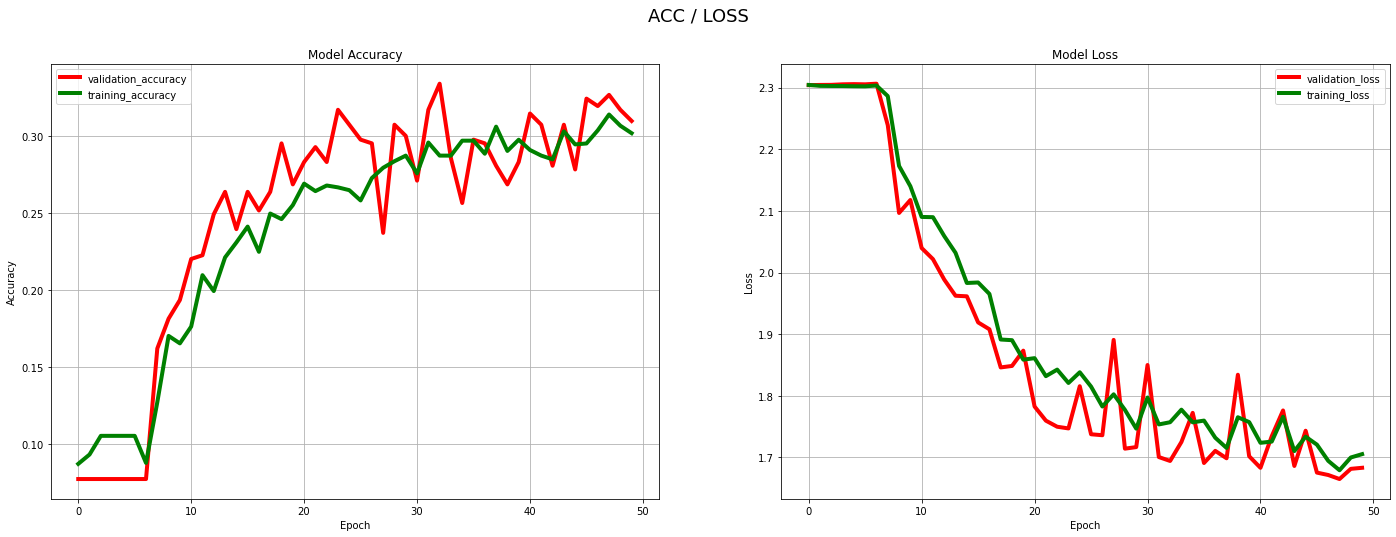

In [355]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

## Iterative Demonstration 

In [366]:
def fit_model(X_train, y_train, X_test, y_test, i):
    # design network
    model = Sequential()
    model.add(Dense(1024, input_shape=(4096,), activation="relu"))
    model.add(Dense(1024,activation= 'relu'))
    model.add(Dense(512,activation= 'relu'))
    model.add(Dense(256,activation= 'relu'))                
    model.add(Dense(128,activation= 'relu'))
    model.add(Dense(64,activation= 'relu'))
    model.add(Dense(10,activation= 'softmax'))
    #optimizer
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.99)
    model.compile(optimizer = optimizer , loss = 'categorical_crossentropy', metrics=["accuracy"])
    # fit network
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))
    # forecast
    #yhat = model.predict(X, verbose=0)
    #print(mean_squared_error(y, yhat[:,0]))
    #evaluate
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    print("{}: {:.2f}%".format("accuracy percentage", score[1]*100))

In [367]:
# repeat experiment
from numpy.random import seed
seed(1)
repeats = 10
for i in range(repeats):
    fit_model(X_train, y_train, X_test, y_test, i)

Epoch 1/50
52/52 [==============================] - 5s 72ms/step - loss: 2.3044 - accuracy: 0.1191 - val_loss: 2.3032 - val_accuracy: 0.0775
Epoch 2/50
52/52 [==============================] - 3s 67ms/step - loss: 2.3025 - accuracy: 0.1065 - val_loss: 2.3050 - val_accuracy: 0.0847
Epoch 3/50
52/52 [==============================] - 3s 65ms/step - loss: 2.3027 - accuracy: 0.1071 - val_loss: 2.3051 - val_accuracy: 0.0775
Epoch 4/50
52/52 [==============================] - 4s 70ms/step - loss: 2.3021 - accuracy: 0.1057 - val_loss: 2.3058 - val_accuracy: 0.0775
Epoch 5/50
52/52 [==============================] - 4s 73ms/step - loss: 2.3018 - accuracy: 0.1168 - val_loss: 2.3058 - val_accuracy: 0.0775
Epoch 6/50
52/52 [==============================] - 4s 80ms/step - loss: 2.3024 - accuracy: 0.0996 - val_loss: 2.3112 - val_accuracy: 0.0775
Epoch 7/50
52/52 [==============================] - 4s 76ms/step - loss: 2.2982 - accuracy: 0.0926 - val_loss: 2.3500 - val_accuracy: 0.0775
Epoch 8/50
52

52/52 [==============================] - 4s 74ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3066 - val_accuracy: 0.0775
Epoch 9/50
52/52 [==============================] - 4s 78ms/step - loss: 2.3025 - accuracy: 0.0975 - val_loss: 2.3067 - val_accuracy: 0.0775
Epoch 10/50
52/52 [==============================] - 4s 79ms/step - loss: 2.3009 - accuracy: 0.1167 - val_loss: 2.3057 - val_accuracy: 0.0775
Epoch 11/50
52/52 [==============================] - 4s 80ms/step - loss: 2.2897 - accuracy: 0.1135 - val_loss: 2.1192 - val_accuracy: 0.1671
Epoch 12/50
52/52 [==============================] - 4s 75ms/step - loss: 2.0655 - accuracy: 0.1990 - val_loss: 2.0076 - val_accuracy: 0.2107
Epoch 13/50
52/52 [==============================] - 4s 78ms/step - loss: 1.9818 - accuracy: 0.2076 - val_loss: 2.0006 - val_accuracy: 0.2010
Epoch 14/50
52/52 [==============================] - 4s 78ms/step - loss: 1.9606 - accuracy: 0.2175 - val_loss: 1.9745 - val_accuracy: 0.2300
Epoch 15/50
52/52 [

52/52 [==============================] - 4s 71ms/step - loss: 2.3013 - accuracy: 0.1302 - val_loss: 2.3074 - val_accuracy: 0.0775
Epoch 16/50
52/52 [==============================] - 4s 76ms/step - loss: 2.3014 - accuracy: 0.1193 - val_loss: 2.3072 - val_accuracy: 0.0775
Epoch 17/50
52/52 [==============================] - 4s 76ms/step - loss: 2.3019 - accuracy: 0.1080 - val_loss: 2.3073 - val_accuracy: 0.0775
Epoch 18/50
52/52 [==============================] - 4s 73ms/step - loss: 2.3030 - accuracy: 0.0964 - val_loss: 2.3015 - val_accuracy: 0.0775
Epoch 19/50
52/52 [==============================] - 4s 75ms/step - loss: 2.2902 - accuracy: 0.1144 - val_loss: 2.2848 - val_accuracy: 0.1114
Epoch 20/50
52/52 [==============================] - 4s 81ms/step - loss: 2.2018 - accuracy: 0.1551 - val_loss: 2.0161 - val_accuracy: 0.1961
Epoch 21/50
52/52 [==============================] - 4s 75ms/step - loss: 2.0465 - accuracy: 0.1926 - val_loss: 2.0112 - val_accuracy: 0.2082
Epoch 22/50
52/52 

52/52 [==============================] - 4s 71ms/step - loss: 2.3005 - accuracy: 0.1139 - val_loss: 2.3080 - val_accuracy: 0.0775
Epoch 23/50
52/52 [==============================] - 4s 84ms/step - loss: 2.3035 - accuracy: 0.0928 - val_loss: 2.3070 - val_accuracy: 0.0775
Epoch 24/50
52/52 [==============================] - 4s 83ms/step - loss: 2.3014 - accuracy: 0.0984 - val_loss: 2.3076 - val_accuracy: 0.0775
Epoch 25/50
52/52 [==============================] - 4s 75ms/step - loss: 2.3030 - accuracy: 0.0948 - val_loss: 2.3072 - val_accuracy: 0.0775
Epoch 26/50
52/52 [==============================] - 4s 74ms/step - loss: 2.3004 - accuracy: 0.1088 - val_loss: 2.3082 - val_accuracy: 0.0775
Epoch 27/50
52/52 [==============================] - 4s 74ms/step - loss: 2.3023 - accuracy: 0.1102 - val_loss: 2.3074 - val_accuracy: 0.0775
Epoch 28/50
52/52 [==============================] - 4s 75ms/step - loss: 2.3020 - accuracy: 0.1104 - val_loss: 2.3074 - val_accuracy: 0.0775
Epoch 29/50
52/52 

52/52 [==============================] - 4s 79ms/step - loss: 2.3027 - accuracy: 0.0934 - val_loss: 2.3077 - val_accuracy: 0.0775
Epoch 30/50
52/52 [==============================] - 4s 82ms/step - loss: 2.3028 - accuracy: 0.1060 - val_loss: 2.3079 - val_accuracy: 0.0775
Epoch 31/50
52/52 [==============================] - 4s 73ms/step - loss: 2.3021 - accuracy: 0.1036 - val_loss: 2.3075 - val_accuracy: 0.0775
Epoch 32/50
52/52 [==============================] - 4s 77ms/step - loss: 2.3020 - accuracy: 0.1017 - val_loss: 2.3075 - val_accuracy: 0.0775
Epoch 33/50
52/52 [==============================] - 4s 72ms/step - loss: 2.3025 - accuracy: 0.0972 - val_loss: 2.3079 - val_accuracy: 0.0775
Epoch 34/50
52/52 [==============================] - 4s 78ms/step - loss: 2.3025 - accuracy: 0.0961 - val_loss: 2.3076 - val_accuracy: 0.0775
Epoch 35/50
52/52 [==============================] - 4s 79ms/step - loss: 2.3017 - accuracy: 0.1062 - val_loss: 2.3080 - val_accuracy: 0.0775
Epoch 36/50
52/52 

52/52 [==============================] - 4s 68ms/step - loss: 2.3017 - accuracy: 0.1025 - val_loss: 2.3077 - val_accuracy: 0.0775
Epoch 37/50
52/52 [==============================] - 4s 71ms/step - loss: 2.3040 - accuracy: 0.0890 - val_loss: 2.3079 - val_accuracy: 0.0775
Epoch 38/50
52/52 [==============================] - 4s 71ms/step - loss: 2.3021 - accuracy: 0.1075 - val_loss: 2.3081 - val_accuracy: 0.0775
Epoch 39/50
52/52 [==============================] - 4s 70ms/step - loss: 2.3028 - accuracy: 0.1096 - val_loss: 2.3080 - val_accuracy: 0.0775
Epoch 40/50
52/52 [==============================] - 3s 67ms/step - loss: 2.3023 - accuracy: 0.1160 - val_loss: 2.3077 - val_accuracy: 0.0775
Epoch 41/50
52/52 [==============================] - 4s 67ms/step - loss: 2.3017 - accuracy: 0.1093 - val_loss: 2.3080 - val_accuracy: 0.0775
Epoch 42/50
52/52 [==============================] - 4s 72ms/step - loss: 2.3024 - accuracy: 0.1038 - val_loss: 2.3080 - val_accuracy: 0.0775
Epoch 43/50
52/52 

52/52 [==============================] - 4s 72ms/step - loss: 1.7273 - accuracy: 0.3132 - val_loss: 1.9551 - val_accuracy: 0.2663
Epoch 44/50
52/52 [==============================] - 4s 76ms/step - loss: 1.7235 - accuracy: 0.3057 - val_loss: 1.7770 - val_accuracy: 0.3220
Epoch 45/50
52/52 [==============================] - 4s 75ms/step - loss: 1.7389 - accuracy: 0.3127 - val_loss: 1.7384 - val_accuracy: 0.3438
Epoch 46/50
52/52 [==============================] - 4s 72ms/step - loss: 1.6410 - accuracy: 0.3494 - val_loss: 1.6435 - val_accuracy: 0.3753
Epoch 47/50
52/52 [==============================] - 4s 71ms/step - loss: 1.5343 - accuracy: 0.3852 - val_loss: 1.6343 - val_accuracy: 0.3898
Epoch 48/50
52/52 [==============================] - 4s 76ms/step - loss: 1.5408 - accuracy: 0.4081 - val_loss: 1.7353 - val_accuracy: 0.3366
Epoch 49/50
52/52 [==============================] - 4s 77ms/step - loss: 1.5116 - accuracy: 0.4251 - val_loss: 1.7126 - val_accuracy: 0.3438
Epoch 50/50
52/52 

52/52 [==============================] - 4s 73ms/step - loss: 1.4762 - accuracy: 0.4212 - val_loss: 1.7341 - val_accuracy: 0.3511
Test score: 1.7341094017028809
Test accuracy: 0.35108959674835205
accuracy percentage: 35.11%
Epoch 1/50
52/52 [==============================] - 5s 81ms/step - loss: 2.3039 - accuracy: 0.0979 - val_loss: 2.3037 - val_accuracy: 0.0993
Epoch 2/50
52/52 [==============================] - 4s 70ms/step - loss: 2.3029 - accuracy: 0.1083 - val_loss: 2.3041 - val_accuracy: 0.0847
Epoch 3/50
52/52 [==============================] - 4s 71ms/step - loss: 2.3020 - accuracy: 0.1091 - val_loss: 2.3048 - val_accuracy: 0.0847
Epoch 4/50
52/52 [==============================] - 4s 72ms/step - loss: 2.3025 - accuracy: 0.0988 - val_loss: 2.3050 - val_accuracy: 0.0847
Epoch 5/50
52/52 [==============================] - 4s 74ms/step - loss: 2.3022 - accuracy: 0.1116 - val_loss: 2.3055 - val_accuracy: 0.0847
Epoch 6/50
52/52 [==============================] - 4s 73ms/step - loss

52/52 [==============================] - 4s 78ms/step - loss: 2.1205 - accuracy: 0.1968 - val_loss: 2.2400 - val_accuracy: 0.1404
Epoch 7/50
52/52 [==============================] - 4s 71ms/step - loss: 2.0174 - accuracy: 0.1913 - val_loss: 1.9495 - val_accuracy: 0.1889
Epoch 8/50
52/52 [==============================] - 4s 72ms/step - loss: 1.9027 - accuracy: 0.2603 - val_loss: 1.8624 - val_accuracy: 0.2518
Epoch 9/50
52/52 [==============================] - 4s 78ms/step - loss: 1.8793 - accuracy: 0.2424 - val_loss: 1.9434 - val_accuracy: 0.2203
Epoch 10/50
52/52 [==============================] - 4s 70ms/step - loss: 1.9099 - accuracy: 0.2751 - val_loss: 1.8004 - val_accuracy: 0.2785
Epoch 11/50
52/52 [==============================] - 4s 70ms/step - loss: 1.7766 - accuracy: 0.3054 - val_loss: 1.9136 - val_accuracy: 0.2276
Epoch 12/50
52/52 [==============================] - 4s 71ms/step - loss: 1.8066 - accuracy: 0.2739 - val_loss: 1.7848 - val_accuracy: 0.3002
Epoch 13/50
52/52 [==

## Accuracies with Adam Optimizer
- Iteration 1	--- 36.08%
- Iteration 2	--- 25.91%
- Iteration 3	--- 36.56%
- Iteration 4	--- 7.75%
- Iteration 5	--- 7.75%
- Iteration 6	--- 7.75%
- Iteration 7	--- 40.68%
- Iteration 8	--- 35.11%
- Iteration 9	--- 34.14%
- Iteration 10---	43.34%

## (B). Model with SGD Optimizer

In [361]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Adagrad,Adadelta,Adamax,Nadam


from tensorflow.keras import optimizers
sgd_001 = optimizers.SGD(lr=0.01)
sgd_01 = optimizers.SGD(lr=0.1)
sgd_00000001 = optimizers.SGD(lr=0.0000001)

model = Sequential()

model.add(Dense(1024, input_shape=(4096,), activation="relu"))
model.add(Dense(1024,activation= 'relu'))
model.add(Dense(512,activation= 'relu'))
model.add(Dense(256,activation= 'relu'))                
model.add(Dense(128,activation= 'relu'))
model.add(Dense(64,activation= 'relu'))

model.add(Dense(10,activation= 'softmax'))

model.compile(optimizer=sgd_001, loss='categorical_crossentropy',metrics=['accuracy'])



# setting verbose=1 prints out some results after each epoch
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
52/52 [==============================] - 3s 52ms/step - loss: 2.3026 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0847
Epoch 2/50
52/52 [==============================] - 2s 44ms/step - loss: 2.3025 - accuracy: 0.0934 - val_loss: 2.3034 - val_accuracy: 0.0847
Epoch 3/50
52/52 [==============================] - 2s 45ms/step - loss: 2.3021 - accuracy: 0.0895 - val_loss: 2.3037 - val_accuracy: 0.0847
Epoch 4/50
52/52 [==============================] - 2s 45ms/step - loss: 2.3024 - accuracy: 0.1002 - val_loss: 2.3040 - val_accuracy: 0.0847
Epoch 5/50
52/52 [==============================] - 2s 47ms/step - loss: 2.3025 - accuracy: 0.0927 - val_loss: 2.3042 - val_accuracy: 0.0847
Epoch 6/50
52/52 [==============================] - 3s 56ms/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3046 - val_accuracy: 0.0847
Epoch 7/50
52/52 [==============================] - 3s 56ms/step - loss: 2.3027 - accuracy: 0.0960 - val_loss: 2.3047 - val_accuracy: 0.0847
Epoch 8/50
52

In [362]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print("{}: {:.2f}%".format("accuracy percentage", score[1]*100))

Test score: 2.306898593902588
Test accuracy: 0.07748184353113174
accuracy percentage: 7.75%


## Visualization of Results

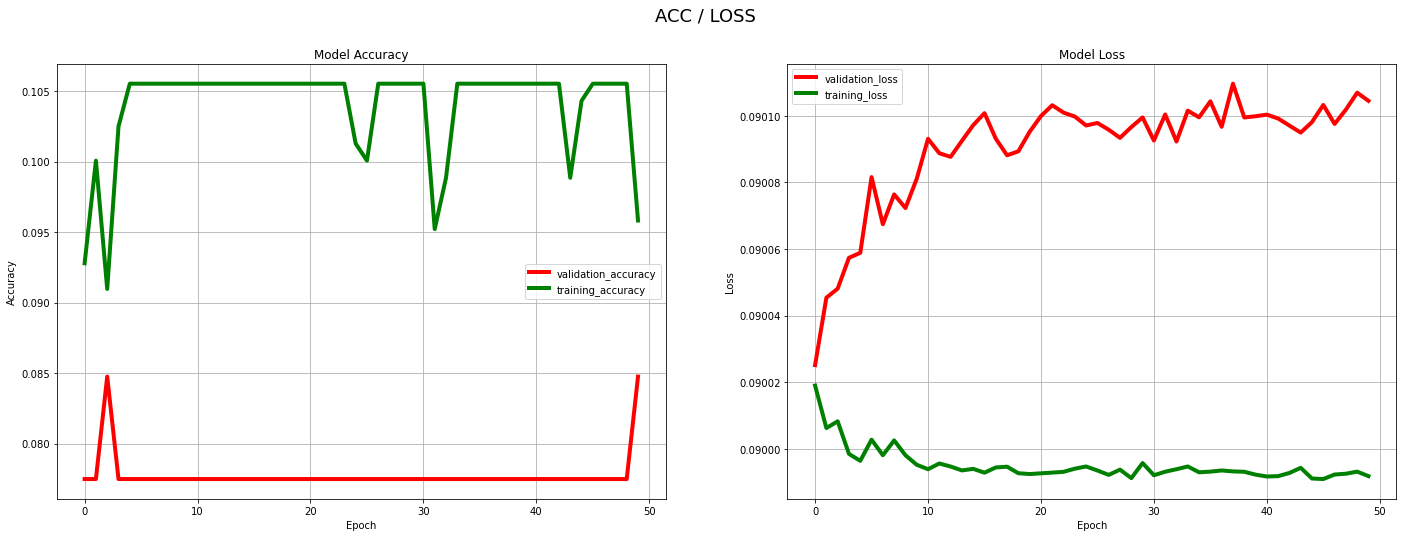

In [374]:
plt.figure(figsize=(24,8))

plt.subplot(1,2,1)
plt.plot(history.history["val_accuracy"],label="validation_accuracy",c="red",linewidth=4)
plt.plot(history.history["accuracy"],label="training_accuracy",c="green",linewidth=4)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(history.history["val_loss"],label="validation_loss",c="red",linewidth=4)
plt.plot(history.history["loss"],label="training_loss",c="green",linewidth=4)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.suptitle("ACC / LOSS",fontsize=18)

plt.show()

## Iterative Demonstration

In [368]:
def fit_model(X_train, y_train, X_test, y_test, i):
    # design network
    model = Sequential()
    model.add(Dense(1024, input_shape=(4096,), activation="relu"))
    model.add(Dense(1024,activation= 'relu'))
    model.add(Dense(512,activation= 'relu'))
    model.add(Dense(256,activation= 'relu'))                
    model.add(Dense(128,activation= 'relu'))
    model.add(Dense(64,activation= 'relu'))
    model.add(Dense(10,activation= 'softmax'))
    #optimizer
    sgd_01 = optimizers.SGD(lr=0.01)
    model.compile(optimizer=sgd_01, loss='categorical_crossentropy',metrics=['accuracy'])
    # fit network
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test,y_test))
    # forecast
    #yhat = model.predict(X, verbose=0)
    #print(mean_squared_error(y, yhat[:,0]))
    #evaluate
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Iteration Number:', i)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    print("{}: {:.2f}%".format("accuracy percentage", score[1]*100))

In [369]:
# repeat experiment
from numpy.random import seed
seed(1)
repeats = 5
for i in range(repeats):
    fit_model(X_train, y_train, X_test, y_test, i)

Epoch 1/50
52/52 [==============================] - 5s 76ms/step - loss: 2.3027 - accuracy: 0.0848 - val_loss: 2.3028 - val_accuracy: 0.0775
Epoch 2/50
52/52 [==============================] - 3s 59ms/step - loss: 2.3026 - accuracy: 0.1034 - val_loss: 2.3032 - val_accuracy: 0.0775
Epoch 3/50
52/52 [==============================] - 3s 56ms/step - loss: 2.3023 - accuracy: 0.1092 - val_loss: 2.3035 - val_accuracy: 0.0799
Epoch 4/50
52/52 [==============================] - 3s 58ms/step - loss: 2.3022 - accuracy: 0.1235 - val_loss: 2.3038 - val_accuracy: 0.0847
Epoch 5/50
52/52 [==============================] - 3s 58ms/step - loss: 2.3025 - accuracy: 0.1031 - val_loss: 2.3040 - val_accuracy: 0.0847
Epoch 6/50
52/52 [==============================] - 3s 65ms/step - loss: 2.3020 - accuracy: 0.1005 - val_loss: 2.3042 - val_accuracy: 0.0847
Epoch 7/50
52/52 [==============================] - 3s 65ms/step - loss: 2.3022 - accuracy: 0.0942 - val_loss: 2.3045 - val_accuracy: 0.0896
Epoch 8/50
52

52/52 [==============================] - 3s 53ms/step - loss: 2.3021 - accuracy: 0.0905 - val_loss: 2.3047 - val_accuracy: 0.0775
Epoch 9/50
52/52 [==============================] - 3s 55ms/step - loss: 2.3022 - accuracy: 0.1118 - val_loss: 2.3049 - val_accuracy: 0.0920
Epoch 10/50
52/52 [==============================] - 3s 62ms/step - loss: 2.3021 - accuracy: 0.1057 - val_loss: 2.3050 - val_accuracy: 0.0847
Epoch 11/50
52/52 [==============================] - 3s 61ms/step - loss: 2.3027 - accuracy: 0.1062 - val_loss: 2.3053 - val_accuracy: 0.0775
Epoch 12/50
52/52 [==============================] - 3s 58ms/step - loss: 2.3011 - accuracy: 0.1151 - val_loss: 2.3052 - val_accuracy: 0.0775
Epoch 13/50
52/52 [==============================] - 3s 54ms/step - loss: 2.3025 - accuracy: 0.0983 - val_loss: 2.3055 - val_accuracy: 0.0775
Epoch 14/50
52/52 [==============================] - 3s 53ms/step - loss: 2.3014 - accuracy: 0.1020 - val_loss: 2.3056 - val_accuracy: 0.0775
Epoch 15/50
52/52 [

52/52 [==============================] - 3s 65ms/step - loss: 2.3026 - accuracy: 0.1078 - val_loss: 2.3057 - val_accuracy: 0.0775
Epoch 16/50
52/52 [==============================] - 3s 60ms/step - loss: 2.3022 - accuracy: 0.1029 - val_loss: 2.3059 - val_accuracy: 0.0775
Epoch 17/50
52/52 [==============================] - 3s 53ms/step - loss: 2.3013 - accuracy: 0.0928 - val_loss: 2.3062 - val_accuracy: 0.0775
Epoch 18/50
52/52 [==============================] - 3s 57ms/step - loss: 2.3026 - accuracy: 0.1027 - val_loss: 2.3064 - val_accuracy: 0.0775
Epoch 19/50
52/52 [==============================] - 3s 61ms/step - loss: 2.3012 - accuracy: 0.0970 - val_loss: 2.3063 - val_accuracy: 0.0775
Epoch 20/50
52/52 [==============================] - 3s 62ms/step - loss: 2.3016 - accuracy: 0.1034 - val_loss: 2.3060 - val_accuracy: 0.0775
Epoch 21/50
52/52 [==============================] - 3s 59ms/step - loss: 2.3018 - accuracy: 0.0980 - val_loss: 2.3062 - val_accuracy: 0.0775
Epoch 22/50
52/52 

52/52 [==============================] - 3s 60ms/step - loss: 2.3016 - accuracy: 0.1034 - val_loss: 2.3062 - val_accuracy: 0.0944
Epoch 23/50
52/52 [==============================] - 3s 60ms/step - loss: 2.3011 - accuracy: 0.1039 - val_loss: 2.3064 - val_accuracy: 0.0847
Epoch 24/50
52/52 [==============================] - 3s 59ms/step - loss: 2.3014 - accuracy: 0.1167 - val_loss: 2.3064 - val_accuracy: 0.0775
Epoch 25/50
52/52 [==============================] - 3s 54ms/step - loss: 2.3018 - accuracy: 0.1136 - val_loss: 2.3065 - val_accuracy: 0.0775
Epoch 26/50
52/52 [==============================] - 3s 55ms/step - loss: 2.3012 - accuracy: 0.1044 - val_loss: 2.3066 - val_accuracy: 0.0775
Epoch 27/50
52/52 [==============================] - 3s 61ms/step - loss: 2.3010 - accuracy: 0.1078 - val_loss: 2.3064 - val_accuracy: 0.0775
Epoch 28/50
52/52 [==============================] - 3s 59ms/step - loss: 2.3016 - accuracy: 0.1103 - val_loss: 2.3065 - val_accuracy: 0.0775
Epoch 29/50
52/52 

Epoch 29/50
52/52 [==============================] - 3s 66ms/step - loss: 2.3023 - accuracy: 0.0997 - val_loss: 2.3073 - val_accuracy: 0.0775
Epoch 30/50
52/52 [==============================] - 3s 65ms/step - loss: 2.3017 - accuracy: 0.0990 - val_loss: 2.3072 - val_accuracy: 0.0775
Epoch 31/50
52/52 [==============================] - 3s 65ms/step - loss: 2.3013 - accuracy: 0.1035 - val_loss: 2.3071 - val_accuracy: 0.0775
Epoch 32/50
52/52 [==============================] - 3s 54ms/step - loss: 2.3019 - accuracy: 0.1021 - val_loss: 2.3071 - val_accuracy: 0.0775
Epoch 33/50
52/52 [==============================] - 3s 56ms/step - loss: 2.3004 - accuracy: 0.1132 - val_loss: 2.3071 - val_accuracy: 0.0775
Epoch 34/50
52/52 [==============================] - 3s 66ms/step - loss: 2.3015 - accuracy: 0.1079 - val_loss: 2.3071 - val_accuracy: 0.0775
Epoch 35/50
52/52 [==============================] - 3s 56ms/step - loss: 2.3015 - accuracy: 0.1102 - val_loss: 2.3071 - val_accuracy: 0.0775
Epoch 

## Accuracies with SGD optimizer

- Iteration 1 --- 7.75%
- Iteration 2 --- 7.75%
- Iteration 3 --- 7.75%
- Iteration 4 --- 7.75%
- Iteration 5 --- 7.75%

## 6. Conclusions and Future Work:

- In this work we created a deep learning  model pipeline to study the sign language dataset of numbers. 
- The model was tuned for various loss and activation functions for accuracy
- We chose two different optimizers **Stochastic Descent and Adam optimizers** and obtained results iteratively for statistical variability
- While **Adam optimizer** resulted in statistically rich results for accuracies in the iteration **SGD optimizer** resulted in a more uniform set of values
- Moreover, accuracies with **SGD optimizer** suffered as it got stuck in local minimums at the stage of minimizing the error with frequent updates and performed lower than other optimizers at equal epoch values.
- **Adam Optimizer** gave an accuracy of about **45%** and it is better for the current dataset
- A **more sophisticated modeling pipeline** with convolution, pooling, flatten will have better accuracy than the one currently proposed
- The novel developments in **computer vision** and other deep learning techniques make the development in image classification call for interesting improvements in the model but it **beyond the scope** of the **current study** as it is just an **introductory level study in deep learning.**